In [47]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
# Statistical analysis
from scipy import stats
import scipy.stats as stats
from numpy import mean
import numpy as np


# Reflect Tables into SQLAlchemy ORM

In [48]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy.sql.expression import text

In [49]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [51]:
# reflect an existing database into a new model

Base = automap_base()
Base.prepare(engine, reflect=True)

In [52]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [53]:
# Save references to each table
Measurement= Base.classes.measurement
Station= Base.classes.station



In [54]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [55]:

#Inspect the tables in the database inspector.get_table_names()
inspector=inspect(engine)
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [56]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [57]:
last_datapoint_date=pd.read_sql('select max(date) from measurement',conn)
last_datapoint_date

,max(date)
0,2017-08-23


In [58]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Last datapoint date is 23-Aug-2017 ie 2017-08-23 and 12 months before is 2016-08-23
rainfall_last_12_months_df=pd.read_sql('select date date,prcp from measurement where date \
between "2016-08-23"  and "2017-08-23" order by date desc ',conn)
#rainfall_last_12_months_df.set_index('date', inplace=True, )

#Dataframe is ordered by date descending so
rainfall_last_12_months_df.head(10)


,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
5,2017-08-22,0.00
6,2017-08-22,0.50
7,2017-08-21,0.00
8,2017-08-21,0.02
9,2017-08-21,NaN


In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Last datapoint date is 23-Aug-2017 ie 2017-08-23 and 12 months before is 2016-08-23
x_df=pd.read_sql('select substr(date,1,7) yr_month ,avg(prcp) from measurement where date \
between "2016-08-23"  and "2017-08-23" group by yr_month order by date asc ',conn)
x_df.set_index('yr_month', inplace=True, )

#Dataframe is ordered by date
x_df.head(100)


,avg(prcp)
yr_month,
2016-08,0.392642
2016-09,0.285549
2016-10,0.121620
2016-11,0.120234
2016-12,0.199494
2017-01,0.070294
2017-02,0.241111
2017-03,0.175266
2017-04,0.321111


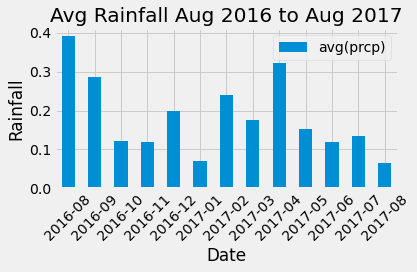

In [86]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the Results in a Matplotlib bar chart

x_df.plot(kind='bar',rot=45)
plt.title("Avg Rainfall Aug 2016 to Aug 2017")
plt.xlabel("Date")
plt.ylabel("Rainfall")
plt.tight_layout()
plt.figsize=(15, 10)
plt.savefig('Images/AvgRainfall2016-2017.jpg')
plt.show()


In [67]:
# Calculate the date 1 year ago from the last data point in the database (see above)
# last_datapoint_date
from dateutil.relativedelta import relativedelta
now= dt.datetime(2017, 8, 23)
one_year_ago=now - relativedelta(years=1)
print(one_year_ago)



2016-08-23 00:00:00


In [68]:
# Perform a query to retrieve the data and precipitation scores. I assume its one year prior 
# to the last query otherwise its the same data being retrieved
y_df=pd.read_sql('select substr(date,1,7) yr_month ,avg(prcp) from measurement where date \
between "2015-08-23"  and "2016-08-23" group by yr_month order by date asc ',conn)
y_df.set_index('yr_month', inplace=True, )

#Dataframe is ordered by date
y_df.head(100)


,avg(prcp)
yr_month,
2015-08,0.719074
2015-09,0.401685
2015-10,0.262222
2015-11,0.427267
2015-12,0.169506
2016-01,0.056353
2016-02,0.054444
2016-03,0.088092
2016-04,0.135455


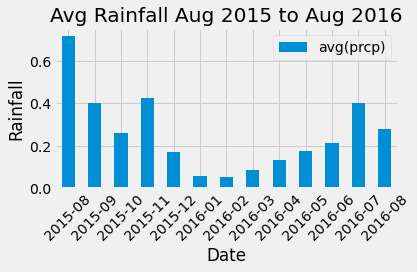

In [87]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the Results in a Matplotlib bar chart
y_df.plot(kind='bar',rot=45)
plt.title("Avg Rainfall Aug 2015 to Aug 2016")
plt.xlabel("Date")
plt.ylabel("Rainfall")
plt.tight_layout()
plt.figsize=(15, 10)
plt.savefig('Images/AvgRainfall2015-2016.jpg')
plt.show()

In [71]:
# Use Pandas to calcualte the summary statistics for the precipitation data
all_rainfall_df=pd.read_sql('select * from measurement where date \
between "2015-08-23"  and "2016-08-23" ',conn)
all_rainfall_df.describe()

,id,prcp,tobs
count,2350.000000,2082.000000,2350.000000
mean,9818.964681,0.235355,74.450638
std,5538.726518,0.589525,4.441272
min,1998.000000,0.000000,56.000000
25%,4948.250000,0.000000,72.000000
50%,8741.500000,0.030000,75.000000
75%,14392.750000,0.200000,78.000000
max,19202.000000,9.640000,86.000000


In [72]:
# Design a query to show how many stations are available in this dataset?
number_of_stations=session.query(Station).count()
number_of_stations=session.query(Measurement).count()
        
print(f"There are {number_of_stations} stations in the measurements dataset")
stations = session.query(Measurement).group_by(Measurement.station).count()
print(f"There are {stations} unique stations")

There are 19550 stations in the measurements dataset
There are 9 unique stations


In [73]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations_df=pd.read_sql('SELECT COUNT(tobs) observations_count, m. station , s.name \
                                       FROM measurement m \
                                       INNER JOIN station s on s.station=m.station \
                                        GROUP BY    m. station , s.name \
                                        ORDER BY    observations_count DESC',conn)
#most_active_stations=session.query(Measurement,func.sum(Measurement.tobs)).group_by(Measurement.station)

#List the stations and the counts in descending order.
most_active_stations_df.head(10)


,observations_count,station,name
0,2772,USC00519281,"WAIHEE 837.5, HI US"
1,2724,USC00519397,"WAIKIKI 717.2, HI US"
2,2709,USC00513117,"KANEOHE 838.1, HI US"
3,2669,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"
4,2612,USC00516128,"MANOA LYON ARBO 785.2, HI US"
5,2202,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
6,1979,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US"
7,1372,USC00517948,"PEARL CITY, HI US"
8,511,USC00518838,"UPPER WAHIAWA 874.3, HI US"


In [74]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs_last_12_months_df=pd.read_sql('select station , tobs temperatures \
                                    from measurement where date \
                                    between "2016-08-23"  and "2017-08-23" \
                                    and station="USC00519281"',conn)
#tobs_last_12_months_df.set_index('station', inplace=True, )

#Dataframe is ordered by date descending so
tobs_last_12_months_df.head(100)

,station,temperatures
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0
...,...,...
95,USC00519281,75.0
96,USC00519281,73.0
97,USC00519281,75.0
98,USC00519281,73.0


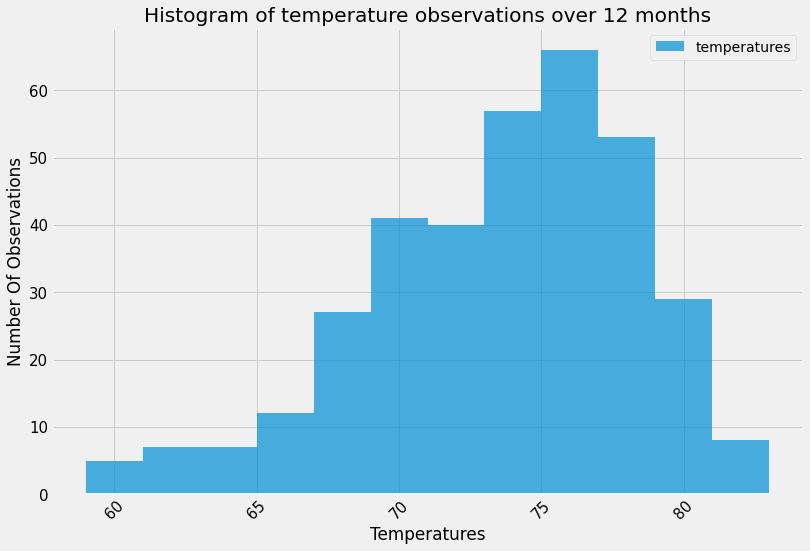

In [81]:


#Frequency Histogram of temperature observations (tobs) for last 12 months

# Set title
# Creating histogram
tobs_last_12_months_df.plot(kind='hist',
        alpha=0.7,
        bins=12,
        title='Histogram of temperature observations over 12 months',
        rot=45,
        xlabel='Temperature',
        grid=True,
        figsize=(12,8),
        fontsize=15
        )
plt.xlabel('Temperatures')
plt.ylabel("Number Of Observations");
plt.savefig('Images/Temp_Histogram.jpg')

In [35]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

stats_from_most_active_station=pd.read_sql('SELECT min(tobs) min_temp, \
                                            round(avg(tobs),0) avg_tem, \
                                             min(tobs) max_temp \
                                         FROM measurement \
                                        WHERE date between "2016-08-23" \
                                        and "2017-08-23" \
                                       and station= "USC00519397"',conn)
#most_active_stations=session.query(Measurement,func.sum(Measurement.tobs)).group_by(Measurement.station)
stats_from_most_active_station

,min_temp,avg_tem,max_temp
0,60.0,75.0,60.0


## Bonus Challenge Assignment

In [36]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage for chosen trip dates
print(calc_temps('2017-01-01', '2017-01-14'))

[(60.0, 68.47619047619048, 81.0)]


In [37]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# function usage for chosen trip dates
#print(calc_temps('2017-01-01', '2017-01-14'))
trip_temp_df=pd.DataFrame(calc_temps('2017-01-01', '2017-01-14'))
trip_temp_df.rename(columns={'0':'Min_Temp','1':'Avg_Temp','2':'Max_Temp'},inplace = True)
trip_temp_df.head()


,0,1,2
0,60.0,68.47619,81.0


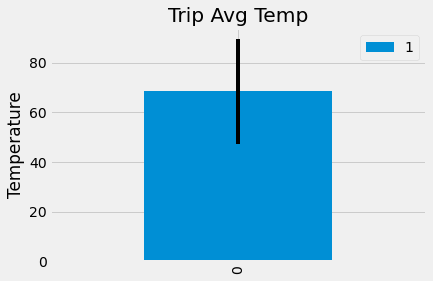

In [102]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_temp_df.plot(kind='bar',y=1,title='Trip Avg Temp', ylabel='Temperature',yerr= trip_temp_df[2]-trip_temp_df[0])
plt.savefig('Images/Trip_Avg_Temp.jpg')



In [39]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
trip_rainfall=pd.read_sql('SELECT sum(prcp) total_rainfall , \
                         m.station, s.name, s.latitude, s.longitude, s.elevation \
                          FROM measurement m \
                        INNER join station s on m.station= s.station \
                        where date between "2017-01-01" and "2017-01-14" \
                        group by m.station, s.name, s.latitude, s.longitude, s.elevation \
                        order by total_rainfall desc ',conn)
trip_rainfall.head()

,total_rainfall,station,name,latitude,longitude,elevation
0,0.63,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
1,0.63,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
2,0.61,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
3,0.35,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
4,0.21,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9


In [40]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
x=daily_normals("01-01")
x[0]
min_temp,avg_temp, max_temp=x[0]
print(min_temp)
print(avg_temp)
print(max_temp)


62.0
69.15384615384616
77.0


In [41]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
#
#Start date is January 1 and end date is Jan 14
travel_days=["01-01", "01-02","01-03","01-04","01-05","01-06","01-07","01-08","01-09",\
    "01-10","01-11","01-12","01-13","01-14" ]
normals = []
#normals2=[]
#Split the results returned from normals into component columns to ease plotting
min_temp_list=[]
avg_temp_list=[]
max_temp_list=[]
trip_day_list=[]

for day in travel_days:
    r=daily_normals (day)
    min_temp,avg_temp, max_temp=r[0]
    #Add trip date to this list
    normals.append(day)
    normals.append(r)
    trip_day_list.append(day)
    min_temp_list.append(min_temp)
    avg_temp_list.append(avg_temp)
    max_temp_list.append(max_temp)      
# show results
#stations_results
normals

['01-01',
 [(62.0, 69.15384615384616, 77.0)],
 '01-02',
 [(60.0, 69.39622641509433, 77.0)],
 '01-03',
 [(62.0, 68.9090909090909, 77.0)],
 '01-04',
 [(58.0, 70.0, 76.0)],
 '01-05',
 [(56.0, 67.96428571428571, 76.0)],
 '01-06',
 [(61.0, 68.96491228070175, 76.0)],
 '01-07',
 [(57.0, 68.54385964912281, 76.0)],
 '01-08',
 [(57.0, 67.16071428571429, 75.0)],
 '01-09',
 [(58.0, 67.9298245614035, 78.0)],
 '01-10',
 [(62.0, 69.74137931034483, 77.0)],
 '01-11',
 [(57.0, 67.3103448275862, 78.0)],
 '01-12',
 [(57.0, 67.4074074074074, 81.0)],
 '01-13',
 [(57.0, 67.25454545454545, 77.0)],
 '01-14',
 [(58.0, 69.52631578947368, 77.0)]]

In [42]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

trip_data_df = pd.DataFrame(
    {'trip_date': trip_day_list,
     'min_temp': min_temp_list,
     'avg_temp': avg_temp_list,
     'max_temp': max_temp_list
    })
trip_data_df.head()

,trip_date,min_temp,avg_temp,max_temp
0,01-01,62.0,69.153846,77.0
1,01-02,60.0,69.396226,77.0
2,01-03,62.0,68.909091,77.0
3,01-04,58.0,70.000000,76.0
4,01-05,56.0,67.964286,76.0


In [43]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_stations_weather_df=pd.DataFrame(normals)
#daily_stations_weather_df.set_index("date")
daily_stations_weather_df.head(14)


,0
0,01-01
1,"[(62.0, 69.15384615384616, 77.0)]"
2,01-02
3,"[(60.0, 69.39622641509433, 77.0)]"
4,01-03
5,"[(62.0, 68.9090909090909, 77.0)]"
6,01-04
7,"[(58.0, 70.0, 76.0)]"
8,01-05
9,"[(56.0, 67.96428571428571, 76.0)]"


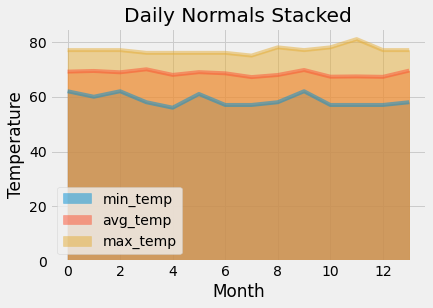

In [99]:
# Plot the daily normals as an area plot with `stacked=False`
#trip_data_df.plot(kind='bar')
ax = trip_data_df.plot.area(stacked=False,title='Daily Normals Stacked',xlabel='Month',ylabel='Temperature')
#trip_temp_df.plot(kind='bar',y=1,title='Trip Avg Temp', yerr= trip_temp_df[2]-trip_temp_df[0])
plt.savefig('Images/daily normals unstacked area plot.jpg')



In [100]:
#Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in,
#  for example, June and December?
temp_jan_jun_df=pd.read_sql('SELECT substr(date,6,2) as month, avg(tobs) as avg_monthly_temp \
                             FROM measurement \
                             where substr(date,6,2) in ("12","06") \
                             group by month',conn)

#Dataframe is ordered by date
temp_jan_jun_df.head(100)


,month,avg_monthly_temp
0,06,74.944118
1,12,71.041529


In [46]:
june_avg=pd.read_sql('select tobs from measurement where substr(date,6,2)="06"',conn)
december_avg=pd.read_sql('select tobs from measurement where substr(date,6,2)="12"',conn)

stats.ttest_ind(june_avg, december_avg ,equal_var=False)

Ttest_indResult(statistic=array([31.35503692]), pvalue=array([4.19352984e-187]))